In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [308]:
import zipfile

zip_ref = zipfile.ZipFile("Cats n Dogs.zip")
zip_ref.extractall()
zip_ref.close()

In [54]:
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [72]:
import pathlib

In [309]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(directory='/content/Cats n Dogs',
                                               batch_size=1,
                                               target_size=(244,244),
                                               class_mode='binary',
                                               shuffle=True,
                                               seed=42)

Found 24 images belonging to 3 classes.


In [310]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(directory='/content/Cats n Dogs',
                                                         batch_size=1,
                                                         target_size=(244,244),
                                                         class_mode='binary',
                                                         shuffle=True,
                                                         seed=42)

Found 24 images belonging to 3 classes.


In [243]:
images,labels = train_data.next()

In [229]:
data_dir = pathlib.Path('/content/Cats n Dogs')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['Cats', 'Dogs'], dtype='<U4')

In [106]:
def show_random(dir):
  plt.figure()
  target = random.choice(os.listdir(dir))
  target_dir = os.path.join(dir,target)
  img = random.choice(os.listdir(target_dir))
  img_path = os.path.join(target_dir,img)
  img = plt.imread(img_path)
  plt.imshow(img)
  plt.axis(False)
  plt.title(target)

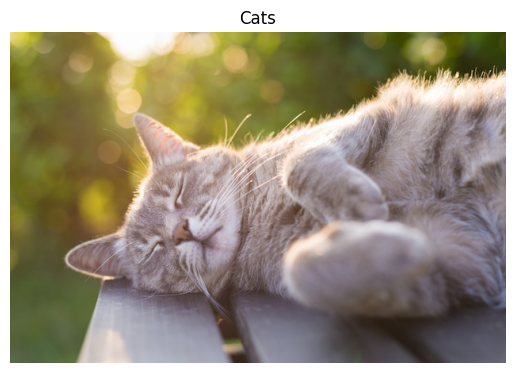

In [312]:
show_random('/content/Cats n Dogs')

In [313]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.optimizers import Adam

In [324]:
model_2 = Sequential([
    Conv2D(filters=10,kernel_size=3, activation='relu',input_shape=(244,244,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_2.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [325]:
history = model_2.fit(train_data_augmented, epochs=5)

Epoch 1/5
24/24 [==============================] - 4s 102ms/step - loss: 0.7106 - accuracy: 0.4583
Epoch 2/5
24/24 [==============================] - 3s 100ms/step - loss: 0.6915 - accuracy: 0.5417
Epoch 3/5
24/24 [==============================] - 3s 103ms/step - loss: 0.6868 - accuracy: 0.5833
Epoch 4/5
24/24 [==============================] - 4s 171ms/step - loss: 0.6908 - accuracy: 0.3750
Epoch 5/5
24/24 [==============================] - 3s 105ms/step - loss: 0.6231 - accuracy: 0.7083


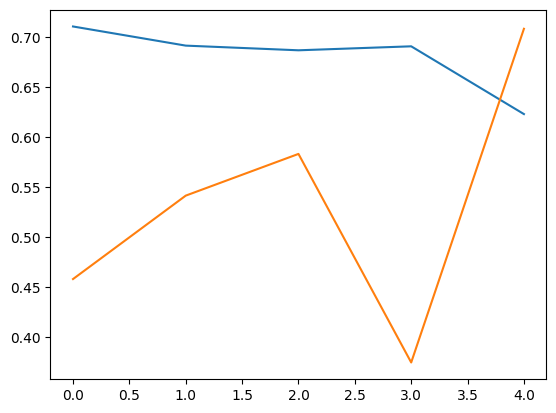

In [327]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

In [214]:
def load_and_pred(model, path, class_names=class_names):
  test = tf.io.read_file(path)
  test = tf.io.decode_image(test)
  test = tf.image.resize(test,[244,244])
  test = test/255.
  test = tf.expand_dims(test,axis=0)
  prediction = tf.squeeze(model.predict(test))
  print(prediction)
  plt.imshow(test[0])
  plt.axis(False)
  plt.title(f'Prediction: {class_names[(round(prediction.numpy()))]}')

1/1 [==============================] - 0s 112ms/step
tf.Tensor(0.37097186, shape=(), dtype=float32)


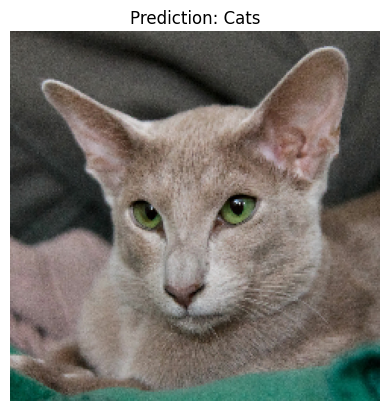

In [326]:
load_and_pred(model_2,'/content/gatinho.jpg')